In [59]:
import time
import os

In [60]:
from skimage import filters
# import skimage

In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
image = cv2.imread("C:\\Users\\ack\\Documents\\Galaxy classification\\Images\\heic1317a_mini.jpg",0)

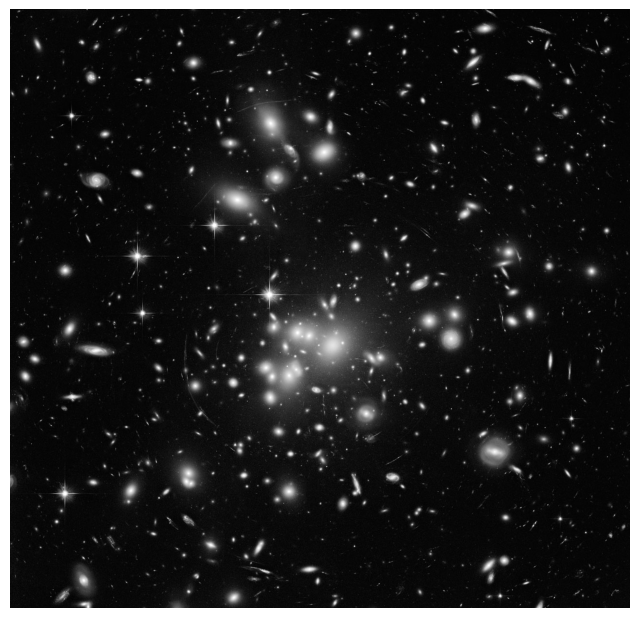

In [63]:
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.show()

In [64]:
flattened_image = image.reshape((image.shape[0] * image.shape[1],))
flattened_image.shape
     

(1582080,)

<Figure size 640x480 with 0 Axes>

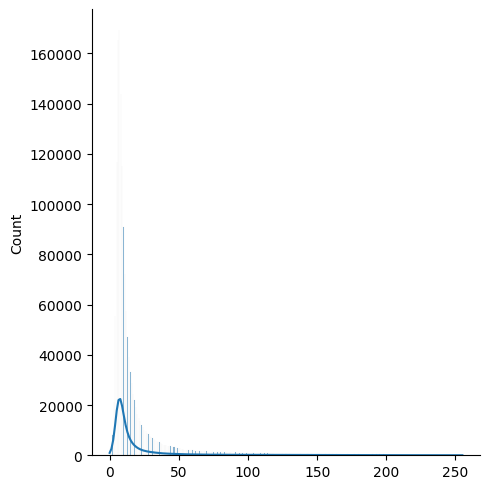

In [65]:
plt.figure()
sns.displot(flattened_image, kde=True)
plt.show()

In [66]:
ret, thresh1 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)   


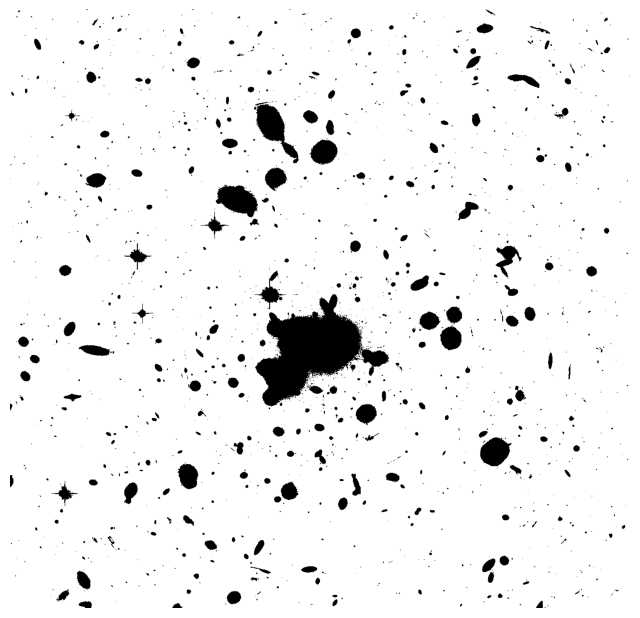

In [67]:
plt.figure(figsize=(8, 8))
plt.imshow(thresh1, cmap="binary")
plt.axis("off")
plt.show()
     

In [68]:
prewitt_image = filters.prewitt(image)

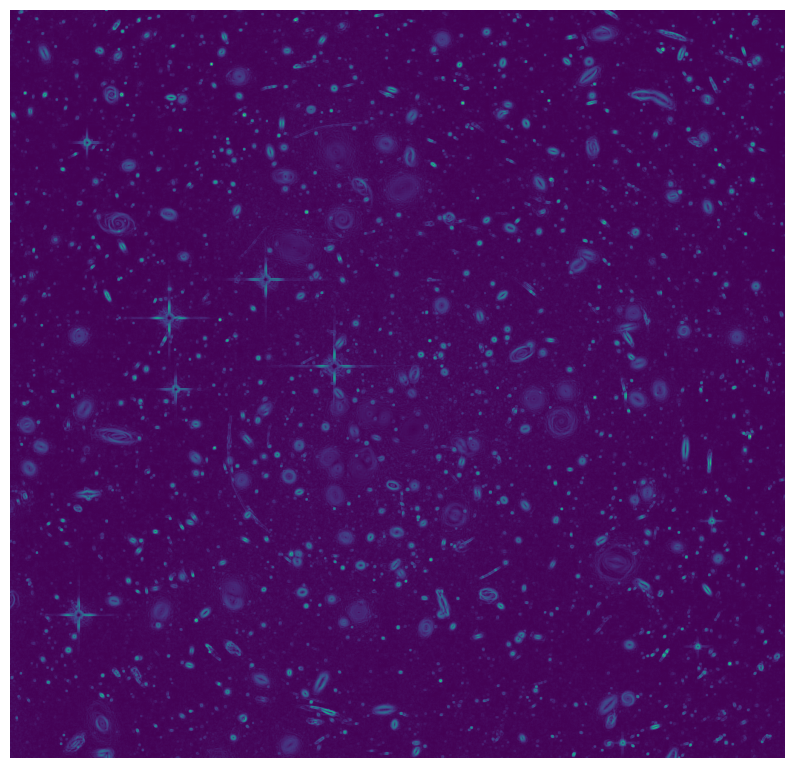

In [92]:
plt.figure(figsize=(10, 10))
plt.imshow(prewitt_image)
plt.axis("off")
plt.show()

In [70]:
##https://towardsdatascience.com/image-segmentation-part-1-9f3db1ac1c50

In [71]:
from skimage.segmentation import slic, mark_boundaries

In [72]:
segments = slic(image,n_segments=700,compactness=0.08)

In [73]:
# help(slic)

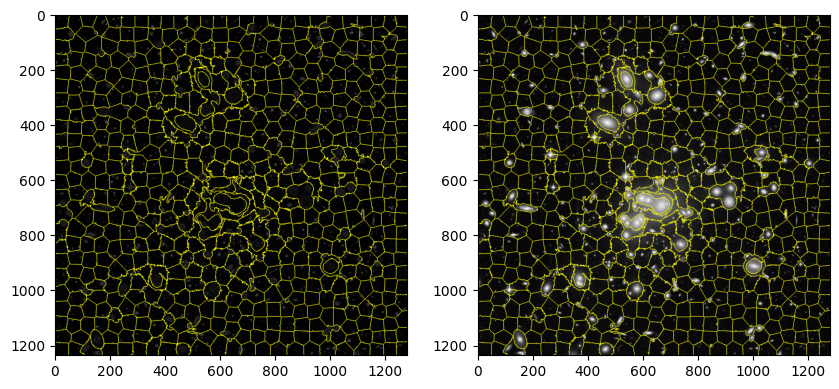

In [74]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(mark_boundaries(prewitt_image, segments))# plt.imshow(image)
plt.subplot(1, 2, 2)
 
# Plotting the output of marked_boundaries
# function i.e. the image with segmented boundaries
plt.imshow(mark_boundaries(image, segments))

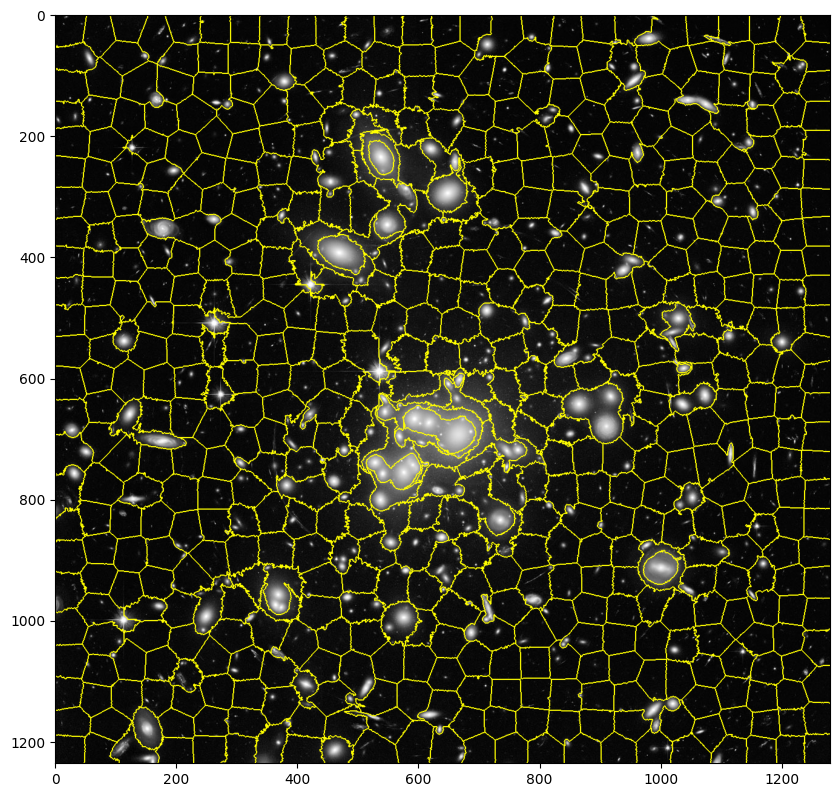

In [93]:
plt.figure(figsize=(10,10))
plt.imshow(mark_boundaries(image, segments))

In [76]:
ima = cv2.imread("C:\\Users\\ack\\Documents\\Galaxy classification\\Images\\heic1317a_mini.jpg",1)
type(ima)

numpy.ndarray

In [77]:
grayscale = cv2.cvtColor(ima, cv2.COLOR_BGR2GRAY)

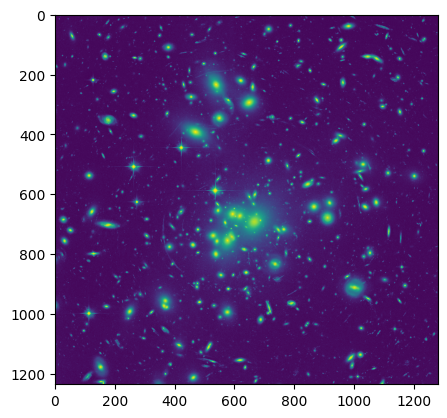

In [78]:
plt.imshow(grayscale)

In [79]:
avg = cv2.threshold(ima, np.mean(ima), 255, cv2.THRESH_BINARY_INV)[1]

In [80]:
avg[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

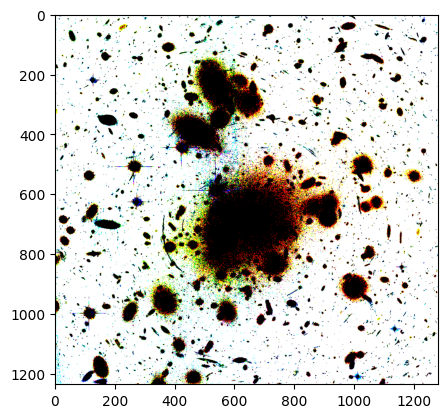

In [81]:
plt.imshow(avg)

In [82]:
edges = cv2.dilate(cv2.Canny(ima, 0, 255), None)

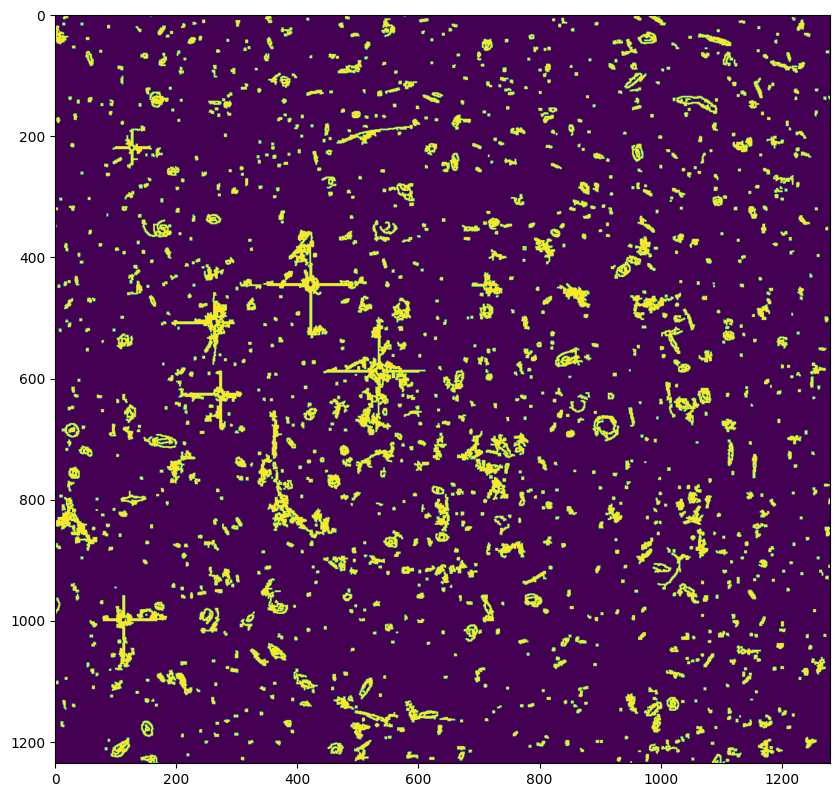

In [83]:
plt.figure(figsize=(10,10))
# plt.imshow(image)
plt.imshow(edges)

In [84]:
thresh = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [85]:
# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

In [86]:
# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [87]:
new_image = image.copy()

In [88]:
timestr = time.strftime("%Y:%m:%d-%H:%M:%S")
os.mkdir(r"C:\\Users\\ack\\Documents\\Galaxy classification\\{}_segemnted".format(timestr))

In [89]:
os.chdir(r"C:\\Users\\ack\\Documents\\Galaxy classification\\{}_segemnted".format(timestr))
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(new_image, (x, y), (x + w, y + h), (255,255,255), 2)
    ROI = original[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1
print(ROI_number)

218


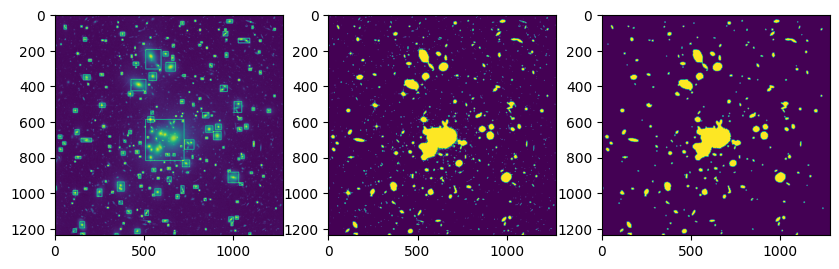

In [90]:
plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1)
plt.imshow(new_image)
plt.subplot(1, 3, 2)
plt.imshow(thresh)
plt.subplot(1, 3, 3)
plt.imshow(opening)
# cv2.waitKey()

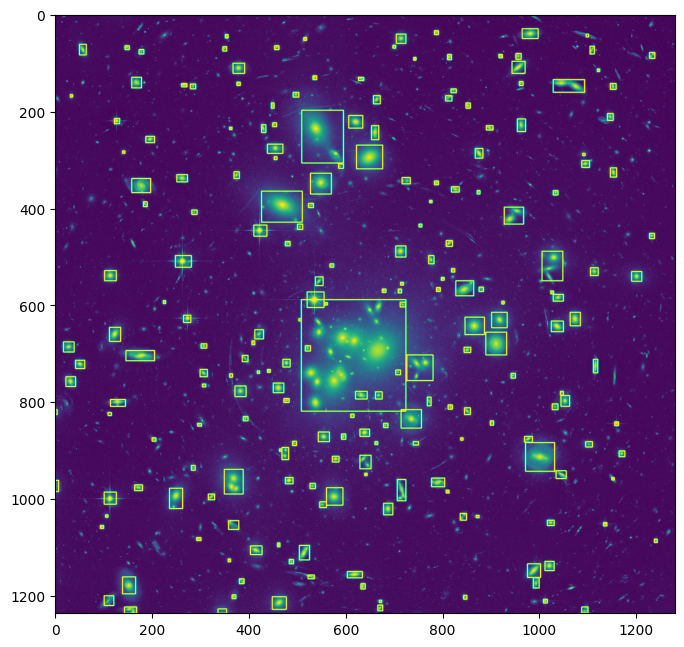

In [94]:
plt.figure(figsize=(8,8))
plt.imshow(new_image)